<a href="https://colab.research.google.com/github/Shashank975/Practice-Projects-ML/blob/main/Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product_ID  500 non-null    object 
 1   Category    500 non-null    object 
 2   Brand       500 non-null    object 
 3   Price       500 non-null    int64  
 4   Rating      500 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 19.7+ KB
None
            Price      Rating
count   500.00000  500.000000
mean   2822.55000    3.028800
std    1260.34009    1.168118
min     503.00000    1.000000
25%    1803.25000    2.000000
50%    2810.00000    3.100000
75%    3879.25000    4.000000
max    4991.00000    5.000000


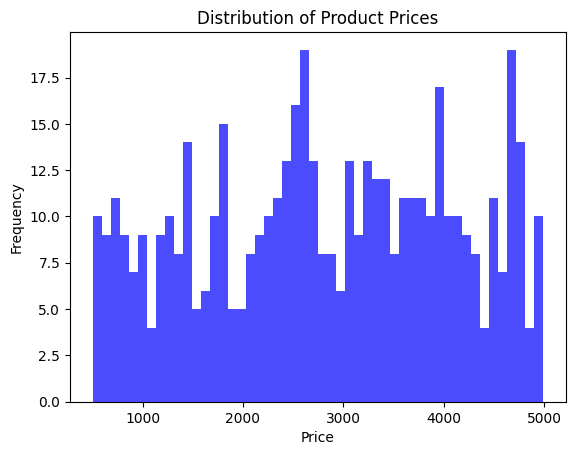

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Optimized RMSE (RandomForest): 1312.621406334091
XGBoost RMSE: 1426.8469171568477


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Load dataset
df = pd.read_csv("/content/product_.csv")

# Basic data checks
print(df.info())  # Check for missing values
print(df.describe())  # Get summary statistics

# Check price distribution
plt.hist(df['Price'], bins=50, color='blue', alpha=0.7)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Product Prices")
plt.show()

# Separate features and target
X = df.drop(columns=['Product_ID', 'Price'])  # Features (excluding ID and target)
y = df['Price']  # Target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical features
categorical_features = ['Category', 'Brand']
numerical_features = ['Rating']

# Apply One-Hot Encoding to categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_cat_encoded = encoder.transform(X_test[categorical_features])

# Convert encoded arrays to DataFrames
X_train_cat_df = pd.DataFrame(X_train_cat_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_test.index)

# Scale numerical features
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_num_scaled = scaler.transform(X_test[numerical_features])

# Convert back to DataFrame
X_train_num_df = pd.DataFrame(X_train_num_scaled, columns=numerical_features, index=X_train.index)
X_test_num_df = pd.DataFrame(X_test_num_scaled, columns=numerical_features, index=X_test.index)

# Combine encoded categorical features with numerical features
X_train_final = pd.concat([X_train_cat_df, X_train_num_df], axis=1)
X_test_final = pd.concat([X_test_cat_df, X_test_num_df], axis=1)

# Hyperparameter tuning for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_final, y_train)

# Best model after tuning
best_rf_model = grid_search.best_estimator_
print("Best Parameters for Random Forest:", grid_search.best_params_)

# Train best Random Forest model
best_rf_model.fit(X_train_final, y_train)
y_pred_rf = best_rf_model.predict(X_test_final)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Optimized RMSE (RandomForest):", rmse_rf)

# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train_final, y_train)
y_pred_xgb = xgb_model.predict(X_test_final)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("XGBoost RMSE:", rmse_xgb)
